In [103]:
#import numpy as np
#np.random.seed(0)
import seaborn as sns
sns.set_theme()
import pandas as pd
import matplotlib.pyplot as plt
#from copy import deepcopy
#from matplotlib import cm

### scratch work to refresh brain about sns

In [8]:
from faker import Faker

In [9]:
fake = Faker()

In [50]:
f_names = [fake.name() for i in range(10)]
f_countries = [fake.country() for i in range(10)]

In [27]:
fake.random_int(0,100)

89

In [51]:
df = pd.DataFrame(columns=f_countries,index=f_names,dtype=int)
        

In [52]:
for name in f_names:
    for country in f_countries:
        df.at[name,country] = fake.random_int(0,100)

In [37]:
import matplotlib
%matplotlib inline

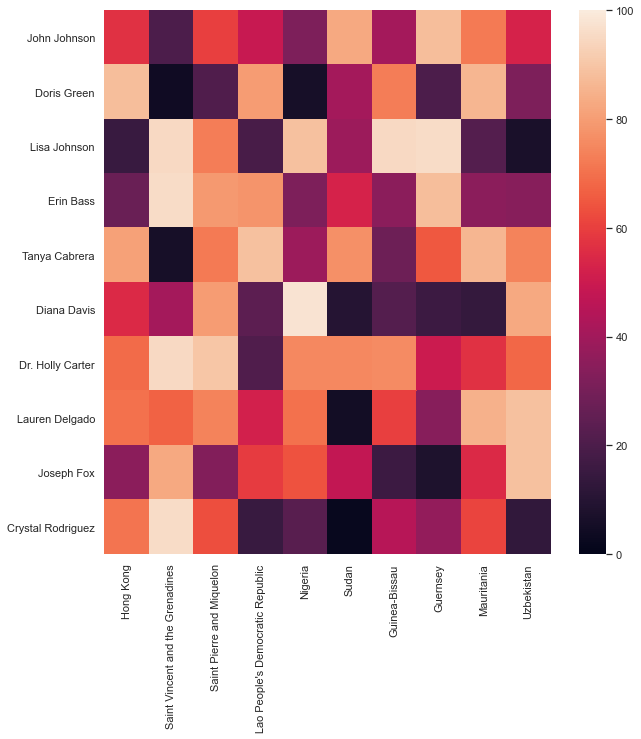

In [58]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df,vmin=0,vmax=100)

<AxesSubplot:>

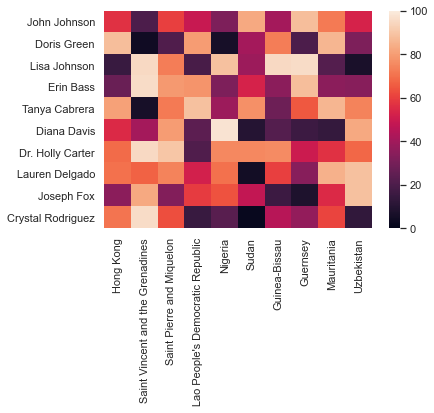

In [55]:
sns.heatmap(df,vmin=0,vmax=100)

In [47]:
df.dtypes

Brunei Darussalam     object
Thailand              object
Argentina             object
Botswana              object
French Polynesia      object
Taiwan                object
Oman                  object
Liberia               object
Russian Federation    object
Oman                  object
dtype: object

In [110]:
df_

,term,count,initial_drug,interaction_drug,reaction
0,1,6021,SYMBICORT,SYMBICORT,DYSPNOEA
1,2,4949,SYMBICORT,SYMBICORT,DYSPNOEA
2,1,4486,SYMBICORT,SYMBICORT,ASTHMA
3,2,1255,SYMBICORT,SYMBICORT,ASTHMA
4,1,2637,SYMBICORT,SYMBICORT,COUGH
...,...,...,...,...,...
2055,2,88,TOPROL-XL,NORVASC,DIARRHOEA
2056,1,218,TOPROL-XL,NORVASC,HYPERTENSION
2057,2,34,TOPROL-XL,NORVASC,HYPERTENSION
2058,1,160,TOPROL-XL,NORVASC,HEADACHE


In [61]:
df_['initial_drug'].unique()

array(['SYMBICORT', 'TAGRISSO', 'NEXIUM', 'CRESTOR', 'FARXIGA',
       'BRILINTA', 'PULMICORT', 'FASLODEX', 'ZOLADEX', 'SELOKEN',
       'TOPROL-XL'], dtype=object)

# Work with data from 1.1-ces-faers_exploration

In [111]:
df_ = pd.read_csv('../data/interim/extracted_data.csv')

In [112]:
# Cleanup
df_ = df_.reset_index(drop=True).rename({'term':'serious'},axis=1)
# Make the 'serious' column more useful, e.g. make 'Not Serious' into 0, keep 'Serious' as 1
df_.loc[df_['serious']==2,'serious'] = 0
        

In [113]:
drugs_grouped = {}
for initial_drug in df_['initial_drug'].unique():
    df_drug = df_.loc[df_['initial_drug']==initial_drug]
    grp_records = {}
    for idx, grp in df_drug.groupby(['interaction_drug','reaction']):
        grp_records[idx] = {'count':grp['count'].sum()
                            ,'%serious':grp.loc[grp['serious']==1,'count'].sum()/grp['count'].sum()  
                           }
    drugs_grouped[initial_drug] = deepcopy(grp_records)

In [114]:
df_pivot = pd.DataFrame.from_dict(drugs_grouped['SYMBICORT'],orient='index')\
            .reset_index()\
            .rename({'level_0':'interaction_drug','level_1':'reaction'},axis=1)\
            .pivot(index='interaction_drug',columns='reaction',values='%serious')

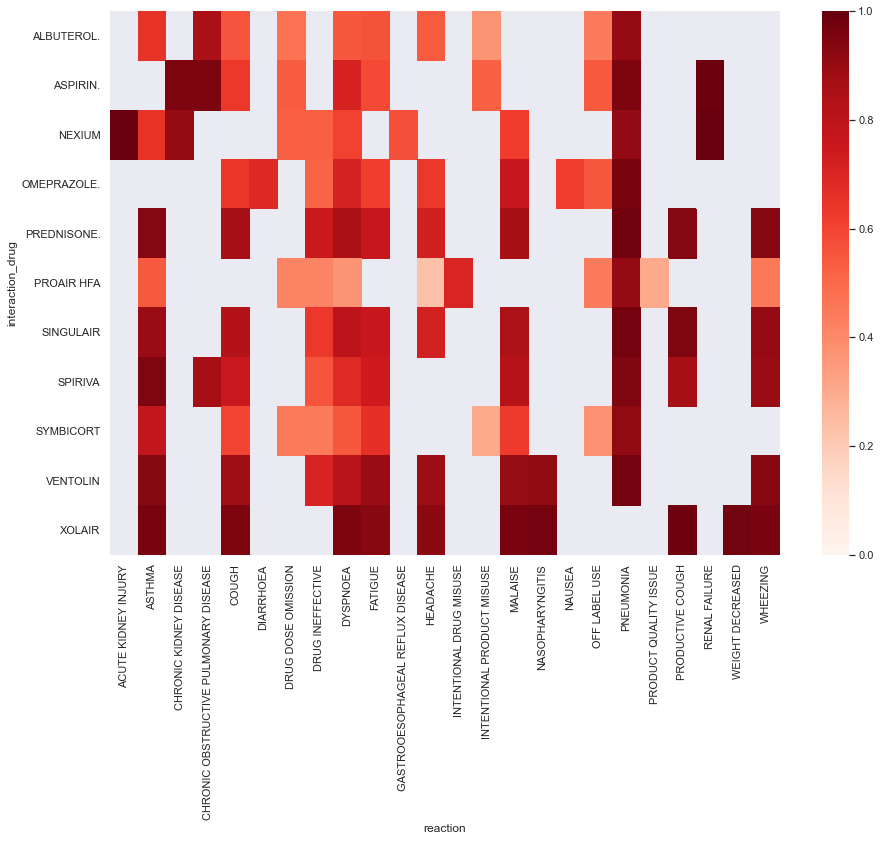

In [115]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df_pivot,vmin=0,vmax=1,cmap=plt.get_cmap('Reds'))

In [82]:
#df_grped = pd.DataFrame(columns=['count','% serious'],dtype=[int,float])
grp_records = {}
grp_records[idx] = {'count':grp['count'].sum()
              ,'%serious':grp.loc[grp['serious']==1,'count'].sum()/grp['count'].sum()
             }

In [83]:
grp_records

{('XOLAIR', 'WHEEZING'): {'count': 20, '%serious': 1.0}}

In [80]:
grp.loc[grp['serious']==1,'count']

114    20
Name: count, dtype: int64

In [79]:
grp

,serious,count,interaction_drug,reaction
114,1,20,XOLAIR,WHEEZING
